In [ ]:
! pip install open3d POT

In [1]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import ot

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
N = 5000

In [3]:
bunny = o3d.data.BunnyMesh() # うさぎのシェイプを取得
mesh = o3d.io.read_triangle_mesh(bunny.path) # メッシュ化
mesh.translate(-mesh.get_center()) # 原点中心に平行移動
pcd = mesh.sample_points_poisson_disk(N, use_triangle_normal=True) # 表面から点を N 点サンプリング
bunny = np.asarray(pcd.points)
bunny_normals = np.asarray(pcd.normals)

In [4]:
mesh = o3d.geometry.TriangleMesh.create_torus() # トーラスのシェイプを取得
R = mesh.get_rotation_matrix_from_xyz((np.pi / 2, 0, 0))
mesh.rotate(R, (0, 0, 0)) # トーラスを回転
mesh.scale(0.05, center=mesh.get_center()) # 原点中心に平行移動
pcd = mesh.sample_points_poisson_disk(N, use_triangle_normal=True) # 表面から点を N 点サンプリング
torus = np.asarray(pcd.points)
torus_normals = np.asarray(pcd.normals)

In [5]:
C = np.sum((bunny.reshape(-1, 1, 3) - torus.reshape(1, -1, 3)) ** 2, 2) # コスト行列
P = ot.emd(np.ones(N) / N, np.ones(N) / N, C, numItermax=1000000) # 最適輸送行列の計算

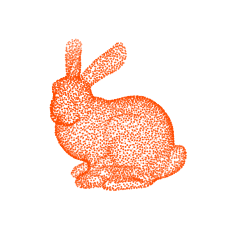

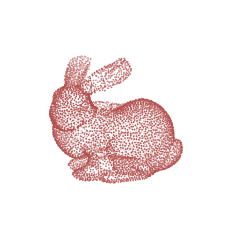

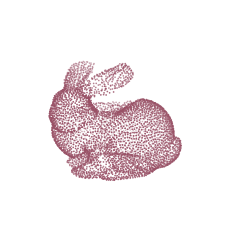

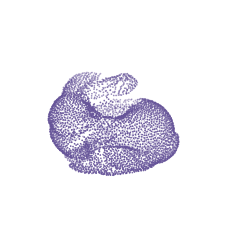

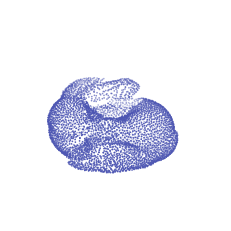

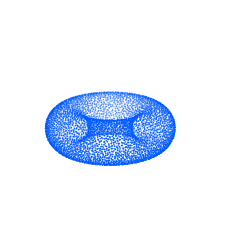

In [6]:
for i, p in enumerate([0, 0.3, 0.4, 0.6, 0.7, 1.0]):
    target = N * P @ torus # 輸送先を計算
    target_normals = N * P @ torus_normals
    pos = (1 - p) * bunny + p * target # 変位補間（定義 8.3）
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2], s=0.5, c=[(1 - p, (1 - p) * 0.294 + p * 0.353, p)]*N)
    ax.set_xlim(bunny[:, 0].min(), bunny[:, 0].max())
    ax.set_ylim(bunny[:, 1].min(), bunny[:, 1].max())
    ax.set_zlim(bunny[:, 2].min(), bunny[:, 2].max())
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.xaxis.pane.set_alpha(0)
    ax.xaxis.line.set_alpha(0)
    ax.yaxis.pane.set_alpha(0)
    ax.yaxis.line.set_alpha(0)
    ax.zaxis.pane.set_alpha(0)
    ax.zaxis.line.set_alpha(0)
    ax.view_init(elev=110, azim=-90)